### operations of one store 



In [1]:
selected_store='37750976-cd54-44a5-a05a-d85d3cc9035b'

In [2]:
#import packages
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
import datetime as dt

from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error

In [3]:
# Import customer list
u_df=pd.read_csv('./data/Users_sanitized.csv', sep=',', index_col='UserId')
u_df.head()

,Unnamed: 0,CreationTimestamp,ClaimType,IsOfflineUser
UserId,,,,
eecc280c-9941-41bc-b26f-d519da794a5d,0,1970-01-01 00:00:00+00,consumer,False
d9d8a373-29f0-4fe5-8f17-39669083ac48,1,1970-01-01 00:00:00+00,consumer,True
8f27c773-334a-4f8c-82c2-8cdec215a9bb,2,1970-01-01 00:00:00+00,consumer,True
aefe87c8-f537-4bdc-954f-6833a047081b,3,1970-01-01 00:00:00+00,consumer,True
6ad98c4e-18e3-4a6e-ac94-1338cb239c2d,4,1970-01-01 00:00:00+00,consumer,True


In [4]:
set(list(u_df['ClaimType']))

{'admin',
 'catering_consumer',
 'consumer',
 'imc',
 'imsmc',
 'storeappuser',
 'superAdmin'}

In [5]:
# Import merchants
m_df=pd.read_csv('./data/MerchantInfos.csv', sep=',', index_col='Id')
m_df.head()

,MerchantId,Name,Longitude,Latitude,CreationDate,CategoryId,SellsOfflineCards,StreetAddress,ZipCode,City,Country,CanGetBowl,CanPreorder,IsPublished,ShowInStats
Id,,,,,,,,,,,,,,,
83787f7a-b659-44b6-a8aa-d1ef5b958a65,ed2c2eea-8399-4779-a9ea-dafb77878965,SAP WDF49 - Food Factory,8.642271,49.292543,2021-06-28 11:56:10.812661,4,False,Dietmar-Hopp-Allee 17,69190,Walldorf,NaN,True,False,True,True
4cd61f39-ddce-449f-8d1a-ef95c7b25307,cc8b8b51-efd7-4d74-84c8-4721619867df,Guten Dag,13.413539,52.548254,2020-07-14 19:44:49.101383,2,False,Schönhauser Allee 120,10437,Berlin,DE,False,True,True,True
fa17e91f-cdfb-4912-81c9-92cd0b87328e,78ecc5a3-0ea0-4820-9fd2-637c95d73782,Gasthaus Brückenschänke,7.771990,49.943655,2021-01-20 10:25:12.831661,2,False,Staatsstraße 4,55442,Stromberg,NaN,True,False,True,True
7c376406-7a5b-4a6c-b22c-e7e02ae0080c,f9b37c73-3a67-47b3-82cd-cfd1d6fafd6a,Com A,13.422482,52.500293,2020-08-26 06:53:57.107271,2,False,Oranienstraße 191,10999,Berlin,NaN,True,False,True,True
f421a5f6-ba67-4336-afc3-021a04da5005,556becfc-1aac-43e2-87d9-cbc3fab0f4b0,BLE - Betriebsgastronomie,7.184823,50.672743,2020-10-01 09:33:59.032472,4,False,Deichmanns Aue 29,53179,Bonn,NaN,True,False,False,True


In [6]:
m_df.loc[selected_store,]

MerchantId           2c1b374d-3d05-4b74-a260-a479c8ef9232
Name                               Krua Thai 2 - Heumarkt
Longitude                                         6.96016
Latitude                                          50.9355
CreationDate                   2020-10-20 18:04:31.643369
CategoryId                                              2
SellsOfflineCards                                   False
StreetAddress                                 Heumarkt 25
ZipCode                                             50667
City                                                 Köln
Country                                               NaN
CanGetBowl                                           True
CanPreorder                                         False
IsPublished                                          True
ShowInStats                                          True
Name: 37750976-cd54-44a5-a05a-d85d3cc9035b, dtype: object

In [7]:
out_df=pd.read_csv('./data/Total Checkout.csv', sep=',', low_memory=False)

out_df['OwnerSince']= pd.to_datetime(out_df['OwnerSince']).dt.tz_convert(tz='Europe/Berlin')
out_df['OwnerTill']= pd.to_datetime(out_df['OwnerTill']).dt.tz_convert(tz='Europe/Berlin')


out_df=out_df.drop(['Unnamed: 0'], axis=1)
store_out=out_df[out_df['StoreId']==selected_store].copy()
#del out_df



store_out.head(2)


,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,DeliveryTokenId,ContainerType
19992,e66232f0-b876-47ea-b4df-2c7889fefeba,vytal_B5IGxbP0bCaHZx,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,825278,334a3fb9-10a1-4695-b629-ca9fcc6d4b84,2021-02-01 14:52:25.061165+01:00,2021-02-01 20:27:52.982723+01:00,b9ddba13-2015-488a-969a-4956aa154617,NaN,1250ml Bowl
19993,e66232f0-b876-47ea-b4df-2c7889fefeba,vytal_B5IGxbP0bCaHZx,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,766693,012a1502-db13-4d36-bad9-72f966b6cd0d,2021-01-25 19:46:06.900683+01:00,2021-02-01 20:27:52.982723+01:00,b720754d-d1ab-4ad9-ba04-ee399f63ead7,NaN,Compartment Bowl


In [8]:
##### import transactions
in_df=pd.read_csv('./data/Total Checkins.csv', sep=',', low_memory=False)

#in_df.info()

in_df['OwnerSince']= pd.to_datetime(in_df['OwnerSince']).dt.tz_convert(tz='Europe/Berlin')
in_df['OwnerTill']= pd.to_datetime(in_df['OwnerTill']).dt.tz_convert(tz='Europe/Berlin')

#print(in_df.info())
in_df=in_df.drop(['Unnamed: 0'], axis=1)
store_in=in_df[in_df['StoreId']==selected_store].copy()
del in_df
store_in.head(2)

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,ContainerType
1215,cdec595e-2f25-4319-acac-56f3164b4b36,vytal_Zlbc8WibHzEGaK,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,3830947,e2a17aff-a4a1-4238-9b93-c42c87e243f1,2021-09-01 20:08:40.571971+02:00,2021-09-06 13:37:36.660946+02:00,35152ccf-eebd-4800-bc48-9ab0c45bc8b3,Compartment Bowl
1216,cdec595e-2f25-4319-acac-56f3164b4b36,vytal_Zlbc8WibHzEGaK,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,3830946,e2a17aff-a4a1-4238-9b93-c42c87e243f1,2021-09-01 20:08:40.571971+02:00,2021-09-06 13:37:36.660946+02:00,b2fc94b2-df98-4a3c-b2da-3612142894be,Compartment Bowl


In [9]:
min(store_in['OwnerTill'])

Timestamp('2020-11-04 14:02:31.523933+0100', tz='Europe/Berlin')

In [10]:
max(store_in['OwnerTill'])

Timestamp('2021-09-06 13:37:36.660946+0200', tz='Europe/Berlin')

## Stock levels at each period.
For the sake of simplicity, I define the perios as .... 

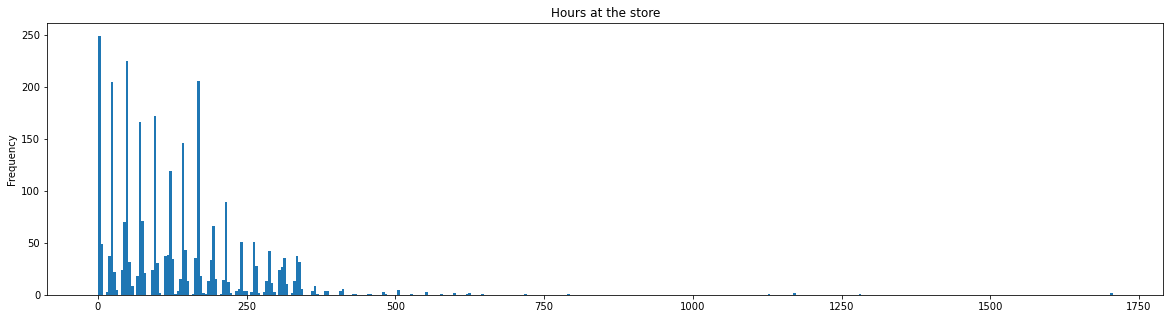

In [134]:
# plt how long containers stay in the restaurant 
# This graph does not convey much information. Some of the containers can be forgotten somewhere in the restaurant.
# They might be at the bottom of the containers pile.
plt.figure(figsize=(20,5))
plt.title('Hours at the store')
plt.ylabel('Frequency')

plt.hist((store_in['OwnerTill']-store_in['OwnerSince']).dt.total_seconds()/3600, bins=400) # convert to hours
plt.show()

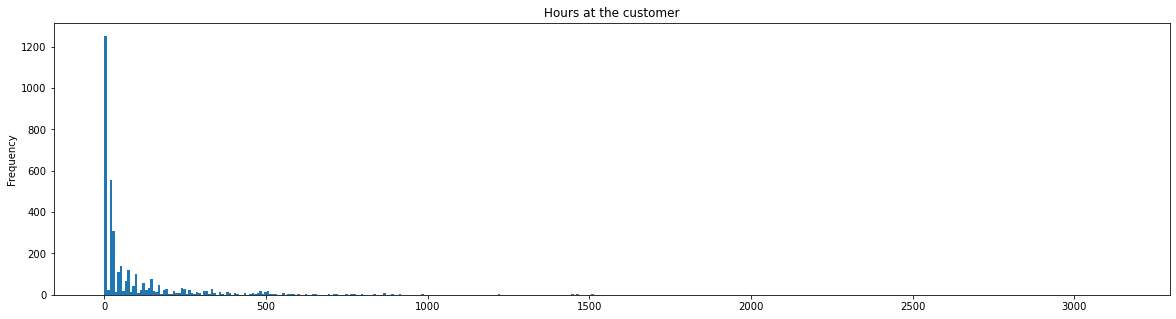

In [135]:
# plt shows how long containers stay with customer 
# This graph reveals very valuable info. 
# Most of customers return the contsiners around in an hour. 

plt.figure(figsize=(20,5))
plt.title('Hours at the customer')
plt.ylabel('Frequency')

plt.hist((store_out['OwnerTill']-store_out['OwnerSince']).dt.total_seconds()/(3600), bins=400) # convert to hours 
plt.show()


In [136]:
#size of transactions
store_out.groupby(by='TransactionId').size().sort_values(ascending=False)

TransactionId
16da4aed-d273-4738-8f5d-92ef7ee3ce2f    35
bfe77c5f-06f7-4681-b4c0-3053f0d0abb9    30
a7ccd44b-3737-4dfb-9ab9-cd2e063f2615    27
87801041-26a9-45d5-a472-d14c06e10fab    25
7c49afe1-0b41-49ff-bb07-4d8a60756f1c    25
                                        ..
55627ed1-14ca-4bb3-8bd6-ed616400dd02     1
baba3b4d-42b0-4f3b-83b6-13ab4051b62a     1
56298a6c-9263-4b9a-8868-4f74a0a96b2b     1
ba376cf6-a7fb-46b4-9a2a-f4796bd16d47     1
0061bdad-90c7-4053-96d0-d08edf712f8e     1
Length: 1107, dtype: int64

In [137]:
#why does a transaction have multiple users?
store_out.groupby(by='TransactionId')['UserId'].nunique().sort_values(ascending=False).head(10)

TransactionId
bfe77c5f-06f7-4681-b4c0-3053f0d0abb9    23
16da4aed-d273-4738-8f5d-92ef7ee3ce2f    19
7c49afe1-0b41-49ff-bb07-4d8a60756f1c    19
87801041-26a9-45d5-a472-d14c06e10fab    18
ea959e7b-e6dd-482a-ae99-ff1cf87abb38    18
a7ccd44b-3737-4dfb-9ab9-cd2e063f2615    16
08fbef4f-3c5c-4d1f-ba69-d28ab32d084a    15
8abb82e7-915a-40f2-8735-2cb0fd1d9af0    14
68f760d3-36ae-4bba-a002-db84ff7f0ccb    13
e4c2dc8d-9480-4629-ae24-41492ecb8ad4    12
Name: UserId, dtype: int64

In [138]:
#Select largest transaction in terms of unique users

index=store_out.groupby(by='TransactionId')['UserId'].nunique().sort_values(ascending=False).head(1)
index=list(dict(index).keys())[0]

store_out[store_out['TransactionId']==index].head()

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,DeliveryTokenId,ContainerType,date
332829,87e0c193-f285-41a2-a4fe-a564ccf8cba5,vytal_U7aZ9AakBkfJSZ,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,1780353,bfe77c5f-06f7-4681-b4c0-3053f0d0abb9,2021-04-19 16:49:49.459346+02:00,2021-04-27 13:09:52.084891+02:00,761f913e-4438-49b2-915c-ce83b808aeaa,NaN,Compartment Bowl,2021-04-19
332888,5569df5e-3b92-494d-ab2c-45cc9243def3,vytal_jOzQEFdj5I6r7v,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,1780349,bfe77c5f-06f7-4681-b4c0-3053f0d0abb9,2021-04-19 16:49:49.459346+02:00,2021-04-27 13:08:19.572493+02:00,4ac45b4f-fc9c-493d-b7cb-89b91b031a01,NaN,Compartment Bowl,2021-04-19
332889,5569df5e-3b92-494d-ab2c-45cc9243def3,vytal_jOzQEFdj5I6r7v,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,1780371,bfe77c5f-06f7-4681-b4c0-3053f0d0abb9,2021-04-19 16:49:49.459346+02:00,2021-04-27 13:08:19.572493+02:00,5bf0ce13-cd42-4991-9cf6-813f1645788d,NaN,Compartment Bowl,2021-04-19
390715,82de1673-44fd-425b-9af0-fbd794b08745,vytal_Yao22X6NttduAG,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,1780363,bfe77c5f-06f7-4681-b4c0-3053f0d0abb9,2021-04-19 16:49:49.459346+02:00,2021-04-20 19:30:07.532995+02:00,1d025e77-68fd-44d1-b610-bb776b3fac02,NaN,Compartment Bowl,2021-04-19
390716,82de1673-44fd-425b-9af0-fbd794b08745,vytal_Yao22X6NttduAG,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,1780364,bfe77c5f-06f7-4681-b4c0-3053f0d0abb9,2021-04-19 16:49:49.459346+02:00,2021-04-20 19:30:07.532995+02:00,82a131da-186c-45da-80f9-7a91c7ee42dc,NaN,Compartment Bowl,2021-04-19


In [139]:
# There is only one single user for incoming transactions in contradiction to outgoing transactions.
store_in.groupby(by='TransactionId')['UserId'].nunique().sort_values(ascending=False).head(6)

TransactionId
fff66b6c-8dde-4985-9c61-3f894b4c5304    1
ffec62c4-1781-4a7f-bd73-0bf66fb538f7    1
501dc2bb-4fe7-4000-9f19-b3c32902a998    1
50b66113-dd1f-49e0-8256-f52c6b3047f9    1
50b7b701-5944-4aa4-9cf4-f25c5d989d57    1
50e8feba-a0fc-463e-a482-b1f08ea3e671    1
Name: UserId, dtype: int64

In [140]:
store_in.groupby(by='UserId').size().sort_values(ascending=False)

UserId
f0e42436-8d1e-4446-b26f-2a372a032260    192
7b7b67b7-abbd-48b6-8791-6058e9f475ac     77
cdec595e-2f25-4319-acac-56f3164b4b36     75
048fd027-2d9a-4a7b-9b90-6587f2edf3ae     67
9e88d44a-a8ec-4ab5-8f35-b0301b9a6c9c     62
                                       ... 
4900fdaa-9686-4281-a85c-3c157d6b0f3f      1
3e42ad5d-455c-48b6-a3d1-d868aec9e900      1
3b5ea91d-276b-4e62-ac0a-e1bc2184087d      1
374ef820-8caf-43f7-9e28-3c88103d5f7b      1
01336890-797e-435d-8140-b72a4e8ccf8e      1
Length: 259, dtype: int64

In [141]:
# create a new df after grouping by days.

ops_day=store_out.groupby(store_out['OwnerSince'].dt.date).size()*(-1) # going out containers

ops_day=pd.DataFrame(ops_day, columns=['out'])
ops_day.index.names=['Date']

ops_day['in']=store_in.groupby(store_in['OwnerTill'].dt.date).size()

ops_day=ops_day.fillna(0)
ops_day['sum']=ops_day['out']+ops_day['in']

ops_day.head()

,out,in,sum
Date,,,
2020-10-21,-1,0.0,-1.0
2020-10-28,-3,0.0,-3.0
2020-11-02,-3,0.0,-3.0
2020-11-03,-3,0.0,-3.0
2020-11-04,-8,4.0,-4.0


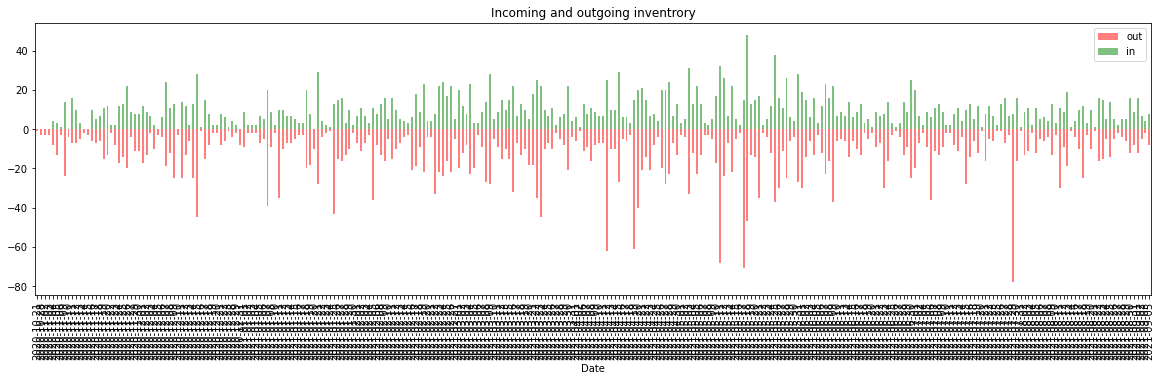

In [142]:
plt.figure(figsize=(20, 5))
plt.title('Incoming and outgoing inventrory')
ops_day['out'].plot.bar(color='Red', legend=True,  alpha=0.5)
ops_day['in'].plot.bar(color='green', legend=True, alpha=0.5)

#ops_day['sum'].plot.bar(color='blue', legend=True)

plt.show()

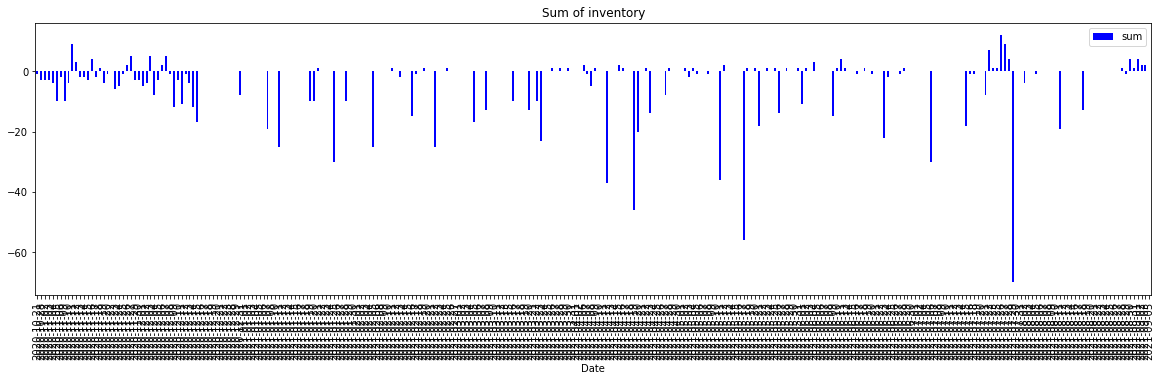

In [143]:
plt.figure(figsize=(20, 5))
plt.title('Sum of inventory')

ops_day['sum'].plot.bar(color='blue', legend=True)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

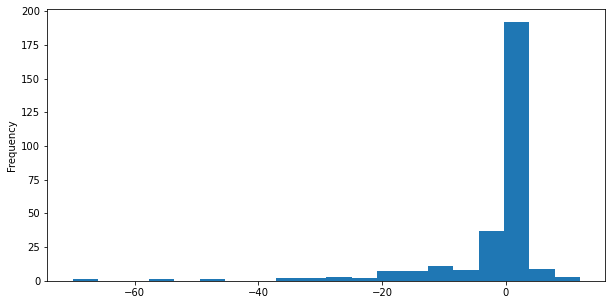

In [144]:
# Daily marginal change distribution 
plt.figure(figsize=(10,5))
ops_day['sum'].plot.hist(bins=20)
plt.show

#### What hapened on the worst day?

In [145]:
min_day=ops_day[ops_day['sum']==ops_day['sum'].min()]
min_day

store_out['date']=store_out['OwnerSince'].dt.date


day_of_interest=pd.DataFrame(store_out[list(min_day.head(1).index)[0]==store_out['date']].groupby(by=['UserId']).size(), columns=['sum'])
day_of_interest.tail(10)

,sum
UserId,
bb30aacd-587c-4b59-b85f-a832ff9df4bf,4
c5143a78-1a92-4fb1-9a2f-a1f777ed6b4e,2
cdec595e-2f25-4319-acac-56f3164b4b36,4
ce975bac-c2ba-4cfe-93c3-fa0db00cbfe6,2
d7763c23-80bb-4b4b-9f3b-c8736b462256,2
e09b63b8-8e8f-463c-b687-03889f7fd612,1
f0e42436-8d1e-4446-b26f-2a372a032260,5
f1160520-e9fc-4896-acb1-77790901d304,2
f8bbcc07-c577-4a11-9255-023e361ca8fe,1


In [146]:
# if there is a different type of consumer
for i,r in day_of_interest.iterrows():
    tpe=u_df.loc[i,'ClaimType']
    if tpe=='consumer':continue
    else:
        print(tpe)

In [147]:
# transactions which are not done by normal consumers
store_in[store_in['UserId'].isin(u_df[u_df['ClaimType']!='consumer'].index)]

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,ContainerType
267028,cd4d8de6-dfa4-49ac-9233-2238349034ae,NaN,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,2186325,e440dc18-7a53-427c-8616-0d4575227cd9,2021-05-11 11:12:16.326495+02:00,2021-07-21 12:44:05.631477+02:00,0eda9d12-8900-4c62-a9fa-10452335f498,750ml Bowl
267029,cd4d8de6-dfa4-49ac-9233-2238349034ae,NaN,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,2186327,e440dc18-7a53-427c-8616-0d4575227cd9,2021-05-11 11:12:16.326495+02:00,2021-07-21 12:44:05.631477+02:00,fa1a7ce6-f7d7-4a37-87b2-2fbd34fac33e,750ml Bowl
599191,976c0493-9ab4-49e1-a0b4-ccdfbbd7b157,NaN,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,2403375,e3df1adf-0ef5-4916-a7f4-720e7b96be66,2021-05-22 13:43:21.429742+02:00,2021-06-01 14:32:00.309296+02:00,e9d320f1-da49-441b-8690-01efaf308f19,Compartment Bowl
599192,976c0493-9ab4-49e1-a0b4-ccdfbbd7b157,NaN,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,2403374,e3df1adf-0ef5-4916-a7f4-720e7b96be66,2021-05-22 13:43:21.429742+02:00,2021-06-01 14:32:00.309296+02:00,12441cbf-dd83-4c14-a258-736602599c24,Compartment Bowl
599193,976c0493-9ab4-49e1-a0b4-ccdfbbd7b157,NaN,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,2403379,e3df1adf-0ef5-4916-a7f4-720e7b96be66,2021-05-22 13:43:21.429742+02:00,2021-06-01 14:32:00.309296+02:00,28ca4ed3-084e-4969-b1a9-e81ac2dc1226,Compartment Bowl
599194,976c0493-9ab4-49e1-a0b4-ccdfbbd7b157,NaN,37750976-cd54-44a5-a05a-d85d3cc9035b,Krua Thai 2 - Heumarkt,2403377,e3df1adf-0ef5-4916-a7f4-720e7b96be66,2021-05-22 13:43:21.429742+02:00,2021-06-01 14:32:00.309296+02:00,f08e3c36-4888-46cd-a2d9-3f93409b618e,Compartment Bowl


In [148]:
store_out[store_out['UserId'].isin(u_df[u_df['ClaimType']!='consumer'].index)]

,UserId,ExternalPickpackId,StoreId,StoreName,LocationId,TransactionId,OwnerSince,OwnerTill,ContainerId,DeliveryTokenId,ContainerType,date


In [149]:
for i in store_in[store_in['UserId'].isin(u_df[u_df['ClaimType']!='consumer'].index)]['UserId'].to_list():
    print(u_df.loc[i,'ClaimType'])

catering_consumer
catering_consumer
catering_consumer
catering_consumer
catering_consumer
catering_consumer


In [150]:
for i in store_out[store_out['UserId'].isin(u_df[u_df['ClaimType']!='consumer'].index)]['UserId'].to_list():
    print(u_df.loc[i,'ClaimType'])

## Time Series 

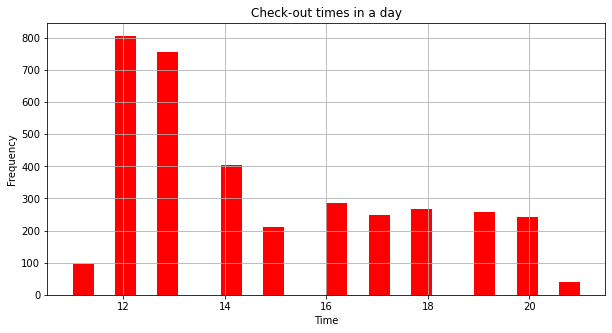

In [180]:
plt.figure(figsize=(10, 5))
plt.title('Check-out times in a day')
plt.ylabel('Frequency')
plt.xlabel('Time')
store_out['OwnerSince'].dt.hour.hist(bins=24, color='red') # checkout times in a day
plt.show()

<AxesSubplot:title={'center':'Check-in times in a day'}, xlabel='Time', ylabel='Frequency'>

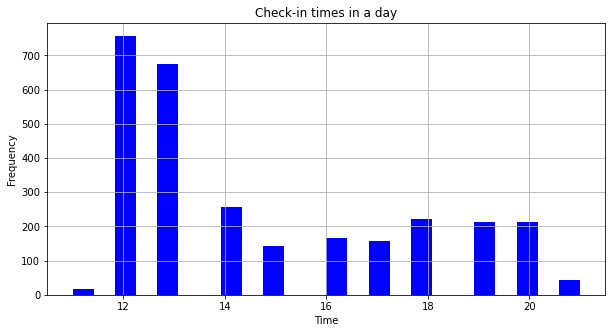

In [165]:
plt.figure(figsize=(10, 5))
plt.title('Check-in times in a day')
plt.ylabel('Frequency')
plt.xlabel('Time')
store_in['OwnerTill'].dt.hour.hist(bins=24, color='blue') # checkins time in a day

In [153]:

ops_out=store_out.groupby(by=store_out['OwnerSince'].dt.date).size().to_frame('count')

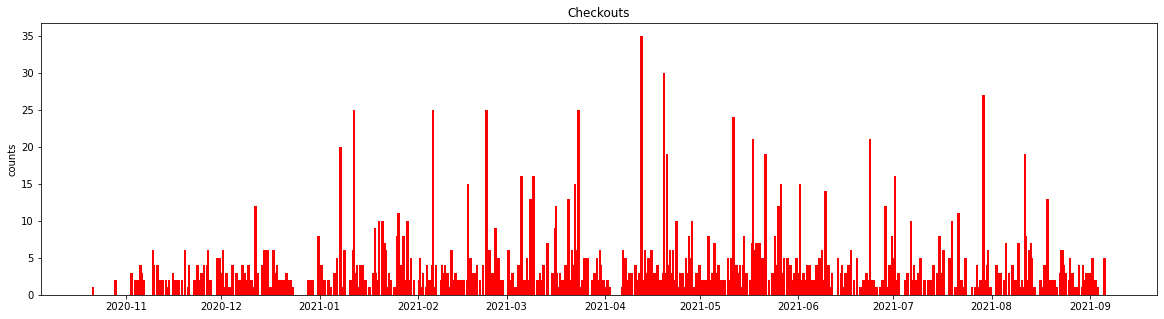

In [181]:
plt.figure(figsize=(20,5))
plt.title('Checkouts')
plt.ylabel('counts')

plt.bar(ops_out.index, ops_out['count'], color='red') # 
plt.show()

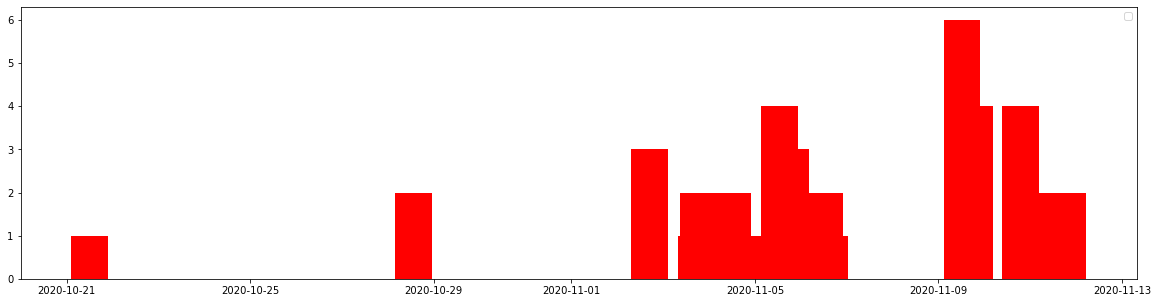

In [182]:
plt.figure(figsize=(20, 5))
plt.bar(ops_out['count'].head(35).index, ops_out['count'].head(35).values, color='red')

plt.legend()
plt.show()

In [176]:
#ops_out = ops_out[ops_out['ds'].dt.dayofweek < 5] # to exclude weekends
# prepare expected column names
store_out['OwnerSince']=store_out['OwnerSince'].apply(lambda x: x.replace(tzinfo=None))


ops_out=store_out.groupby(by=store_out['OwnerSince']).size().to_frame('count')

ops_out['y']= ops_out['count']
ops_out['ds']= pd.Series()
ops_out['ds']=pd.to_datetime(ops_out.index)
# create test dataset, remove last 14 days
train = ops_out.drop(ops_out.index[-28:])

print(train.tail())

                            count  y                         ds
OwnerSince                                                     
2021-08-25 18:11:57.442933      1  1 2021-08-25 18:11:57.442933
2021-08-25 19:20:55.993813      5  5 2021-08-25 19:20:55.993813
2021-08-26 12:54:45.642974      1  1 2021-08-26 12:54:45.642974
2021-08-26 13:34:57.644010      3  3 2021-08-26 13:34:57.644010
2021-08-26 13:44:08.490925      1  1 2021-08-26 13:44:08.490925


/Users/kultiginbozdemir/opt/anaconda3/envs/CO2/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


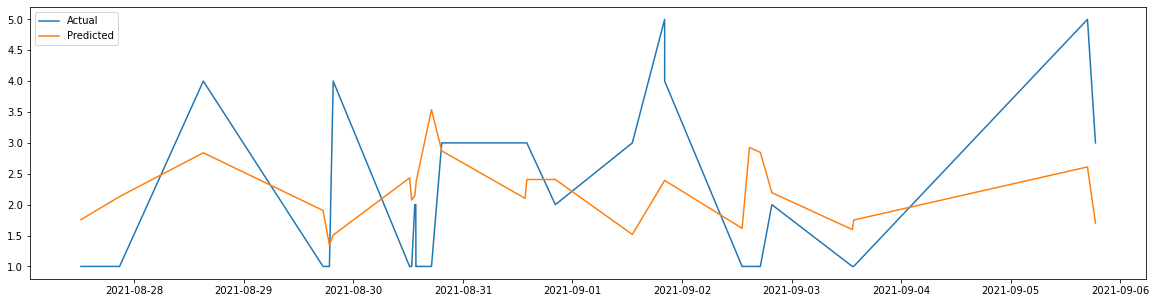

In [177]:

# define the model
model = Prophet(yearly_seasonality=True,daily_seasonality=True, weekly_seasonality=True)  ##.add_country_holidays(country_name='DE')
                
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
future=list(ops_out.loc[ops_out.index[-28:],].index)
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])

# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = ops_out['y'][-28:]
y_pred = forecast['yhat']
#mae = mean_absolute_error(y_true, y_pred)
#print('MAE: %.3f' % mae)
# plot expected vs actual
plt.figure(figsize=(20, 5))
plt.plot(ops_out['y'][-28:].index,ops_out['y'][-28:].values, label='Actual')
plt.plot(forecast.ds,forecast['yhat'], label='Predicted')
plt.legend()
plt.show()

Autocorrelation, or partial autocorrelation <br>
Granger casuality test to predit the return times from check-out times <br>
logistic regression <br>

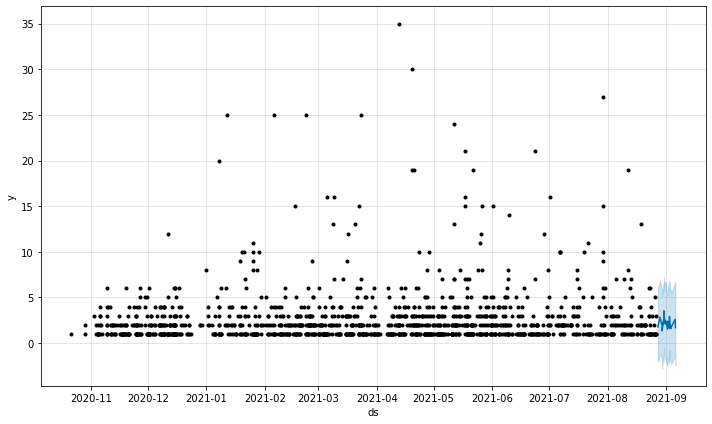

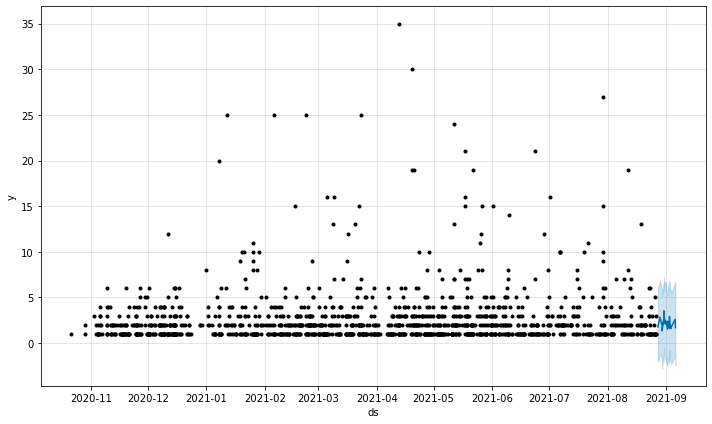

In [178]:
model.plot(forecast)


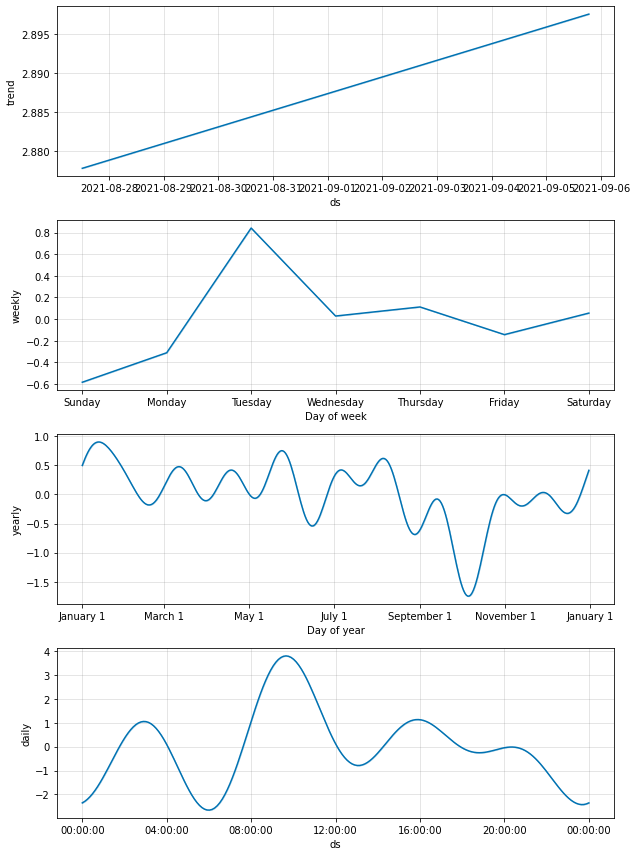

In [179]:
fig2=(model.plot_components(forecast))